 # ***CNN By Hand***

#### **Students**
André Silva, r20191226@novaims.unl.pt
Corssino Tchavana, 20220597@novaims.unl.pt
Diogo Silva, 20221393@novaims.unl.pt
Lucas Ferreira, 20220621@novaims.unl.pt

#### **Data Source**
Data Source: https://www.kaggle.com/datasets/alessiocorrado99/animals10?select=raw-img

Cleaned dataset: https://drive.google.com/file/d/1Gjui5aea1H49boW3rwzYJ6NBkBQa9qDC/view?usp=sharing

#### **Summary**

This notebook relies on the creation and training of a CNN by hand. To do that, first the dataset is loaded.
Then a Sequential model was created in a greedy iterative manner, as an attempt-error method.
The CNN1, the base model, has the following characteristics:
* Input layer (140x100x3);
* Convolutional layer with 32 filters and a kernel size of 3x3;
* MaxPooling2D layer with a pool size of 2x2;
* Convolutional layer with 64 filters and a kernel size of 3x3;
* MaxPooling2D layer with a pool size of 2x2;
* Flatten layer;
* Output layer with 10 units and a softmax activation function

After the creation, the first try on training and predicting the images was done, and there were clear signs of overfitting, to resolve this dropout was added as regularization, with a value of 0.45, creating CNN2.

After another trial, there was an improvement in terms of accuracy, but the overfitting still remained.

To improve the model the groupt then proceed to tune the number of filters, that the values with the best results were 64 and 128, creating a new CNN, with the name CNN3.

The following attempt gave similar results, but the group chose to continue with CNN3 due to its higher capability of learning patterns.

CNN4 has a one more layer comparing to CNN3 but has different number of filters. After its fit, the model was clearly overfitting.

To decrease the overfitting, CNN5 was created that was CNN4 but with an increase in dropout. Its results were better but there was still some overfitting.

The final CNN was CNN7 that was CNN5 with dense layers and also one more layer than CNN6. Its performance increased comparing to the other CNNs but there was still overfitting. This can mean the CNN may not have enough capacity or is due to dataset limitations. 

To have a final comprehension of the CNN misclassifications a confusion matrix was created, calculated precision, recall and f1_scores and the conclusions were that are some specific species that are confused with each other, due to its similarity in images and that the dog class had the worst performance.


References: https://www.analyticsvidhya.com/blog/2020/09/overfitting-in-cnn-show-to-treat-overfitting-in-convolutional-neural-networks/

https://jinwen17.medium.com/tricks-to-prevent-overfitting-in-cnn-model-trained-on-a-small-dataset-b84f05eb4eb7

https://towardsdatascience.com/deep-learning-3-more-on-cnns-handling-overfitting-2bd5d99abe5d

# **Load Dataset and Data Visualzation**

### **Import**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential, layers, initializers, regularizers, optimizers, metrics 

import os
import time
import shutil
import random 
import zipfile

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap

import cv2
from sklearn.utils import shuffle

from google.colab import drive
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import confusion_matrix
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

### **Load Dataset**

From the drive mount the zipped dataset is grabbed from the google drived.
The dataset was manipulated into creating a testing folder with 120 images for each category.
The names of the categories were also translated to English (as they were in Italian)


In [ ]:
# Set the machine
gdrive = True
# Set the connection string
path_aug = "/content/drive/MyDrive/"
main_folder_aug, training_folder, testing_folder = "clean_animals.zip/", "train", "test"
# If using Google Drive
if gdrive:
    # Setup drive
    drive.mount('/content/drive', force_remount=True)        
    # Transfer zip dataset to the current virtual machine
    t0 = time.time()
    shutil.copyfile(path_aug + 'clean_animals.zip', 'clean_animals.zip')
    # Extract files
    zip_ = zipfile.ZipFile('clean_animals.zip')
    zip_.extractall()
    zip_.close()
    print("File transfer completed in %0.3f seconds" % (time.time() - t0))
    path = ""

Mounted at /content/drive
File transfer completed in 11.659 seconds


In [ ]:
image_size=(140, 100)
crop_to_aspect_ratio=True
color_mode='rgb'
batch_size=64
label_mode="categorical"
validation_split=0.2
shuffle=True
seed=0

In [ ]:
# Generate an object of type tf.data.Dataset 
ds_train = image_dataset_from_directory(
    path + training_folder, 
    image_size=image_size,
    crop_to_aspect_ratio=crop_to_aspect_ratio,
    color_mode=color_mode,
    batch_size=batch_size,
    label_mode=label_mode,
    subset=None,  # Set subset to None to use the entire folder for testing
    validation_split=0,  # Set validation_split to 0
    shuffle=shuffle,
    seed=seed)
# Check object properties
print("\nObject's type:\t", type(ds_train))
print("Is it a tf.data.Dataset?\t R:",isinstance(ds_train, tf.data.Dataset))
print("Classes:", ds_train.class_names)

Found 43860 files belonging to 10 classes.

Object's type:	 <class 'tensorflow.python.data.ops.batch_op._BatchDataset'>
Is it a tf.data.Dataset?	 R: True
Classes: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


In [ ]:
# Generate an object of type tf.data.Dataset 
ds_test = image_dataset_from_directory(
    path + testing_folder, 
    image_size=image_size,
    crop_to_aspect_ratio=crop_to_aspect_ratio,
    color_mode=color_mode,
    batch_size=batch_size,
    label_mode=label_mode,
    subset=None,  # Set subset to None to use the entire folder for testing
    validation_split=0,  # Set validation_split to 0
    shuffle=False,
    seed=seed
)
# Check object properties
print("\nObject's type:\t", type(ds_test))
print("Is it a tf.data.Dataset?\t R:",isinstance(ds_test, tf.data.Dataset))
print("Classes:", ds_test.class_names)

Found 3500 files belonging to 10 classes.

Object's type:	 <class 'tensorflow.python.data.ops.batch_op._BatchDataset'>
Is it a tf.data.Dataset?	 R: True
Classes: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


# **CNN Section**

**Sequential model construction in a greedy iterative manner (by hand)**

The input images have dimensions of 140x100 pixels and 3 color channels (RGB).

### **CNN1 - Base**

Considering the characteristics of the dataset, the base model decided was:

* Input layer (140x100x3);
* Convolutional layer with 32 filters and a kernel size of 3x3;
* MaxPooling2D layer with a pool size of 2x2;
* Convolutional layer with 64 filters and a kernel size of 3x3;
* MaxPooling2D layer with a pool size of 2x2;
* Flatten layer;
* Output layer with 10 units and a softmax activation function

In [ ]:
# Define the model
cnn1 = keras.Sequential([
    layers.Input(shape=(140, 100, 3)),    
    # Data preprocessing
    layers.Rescaling(1./255), 
    layers.Conv2D(32, (3,3), activation='relu',name='conv_2_1'),
    layers.MaxPooling2D((2,2),name='max_pooling2d_1'),
    layers.Conv2D(64, (3,3), activation='relu',name='conv_2_2'),
    layers.MaxPooling2D((2,2),name='max_pooling2d_2'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')])

# Compile the model
cnn1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model architecture
cnn1.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_36 (Rescaling)    (None, 140, 100, 3)       0         
                                                                 
 conv_2_1 (Conv2D)           (None, 138, 98, 32)       896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 69, 49, 32)       0         
 2D)                                                             
                                                                 
 conv_2_2 (Conv2D)           (None, 67, 47, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 33, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten_37 (Flatten)        (None, 48576)           

In [ ]:
trained = cnn1.fit(ds_train, epochs=10, validation_data=(ds_test))

Epoch 1/10
686/686 [==============================] - 8s 9ms/step - loss: 1.5018 - accuracy: 0.4870 - val_loss: 1.6190 - val_accuracy: 0.4591
Epoch 2/10
686/686 [==============================] - 6s 8ms/step - loss: 0.8413 - accuracy: 0.7334 - val_loss: 1.6895 - val_accuracy: 0.5026
Epoch 3/10
686/686 [==============================] - 6s 9ms/step - loss: 0.4551 - accuracy: 0.8641 - val_loss: 2.0118 - val_accuracy: 0.5109
Epoch 4/10
686/686 [==============================] - 6s 8ms/step - loss: 0.2381 - accuracy: 0.9327 - val_loss: 2.4386 - val_accuracy: 0.5089
Epoch 5/10
686/686 [==============================] - 6s 9ms/step - loss: 0.1327 - accuracy: 0.9635 - val_loss: 2.9088 - val_accuracy: 0.4931
Epoch 6/10
686/686 [==============================] - 6s 9ms/step - loss: 0.0743 - accuracy: 0.9811 - val_loss: 3.2793 - val_accuracy: 0.4989
Epoch 7/10
686/686 [==============================] - 6s 8ms/step - loss: 0.0505 - accuracy: 0.9869 - val_loss: 3.9445 - val_accuracy: 0.4729
Epoch 

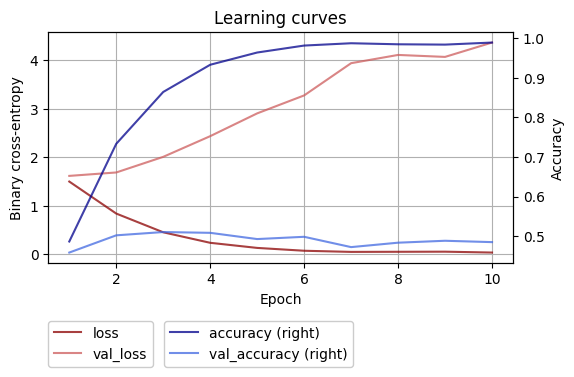

In [ ]:
# Create DataFrame object
df_hist = pd.DataFrame.from_dict(trained.history)
df_hist["Epoch"] = np.arange(1, len(df_hist) + 1, 1)
# Plot learning curves
secondary_y = ["accuracy", "val_accuracy"]  #  ["AUROC", "val_AUROC"] 
ax = df_hist.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                  secondary_y = secondary_y,
                  kind="line", figsize=(6, 3), grid=True, legend=True,
                  ylabel="Binary cross-entropy", 
                  xlabel="Epoch", title="Learning curves",                  
                  color=['darkred', 'indianred', "darkblue", "royalblue"], alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Accuracy")
ax.right_ax.legend(loc=(0.25, -0.45), framealpha=1.0)
ax.legend(loc=(0, -0.45), framealpha=1.0)
plt.show()

There is clearly overfitting since the validation loss is high and there is a significant drop from accuracy to val_accuracy

In order to create a model that generalizes better and has less overfitting, the group decided to add regularization, in this case dropout.

### **CNN2 - dropout**

The droupout rate after the last pooling layes, and the metrics it stabilized around are:

0.5 -- loss: 0.2107 - accuracy: 0.9307 - val_loss: 2.5234 - val_accuracy: 0.5303

0.2 -- loss: 0.0819 - accuracy: 0.9741 - val_loss: 4.5273 - val_accuracy: 0.4931

0.15 -- loss: 0.1654 - accuracy: 0.9455 - val_loss: 3.2709 - val_accuracy: 0.4886

0.45 -- loss: 0.2392 - accuracy: 0.9200 - val_loss: 2.4083 - val_accuracy: 0.5354

0.4 -- loss: 0.1935 - accuracy: 0.9355 - val_loss: 2.8613 - val_accuracy: 0.5146

The chosen value is 0.45 .

In [ ]:
# Define the model
cnn2 = keras.Sequential([
    layers.Input(shape=(140, 100, 3)),    
    # Data preprocessing
    layers.Rescaling(1./255), 
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.45),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Print a summary of the model architecture
cnn2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 140, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 138, 98, 32)       896       
                                                                 
 batch_normalization (BatchN  (None, 138, 98, 32)      128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 69, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 67, 47, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 67, 47, 64)       2

In [ ]:
trained = cnn2.fit(ds_train, epochs=14, validation_data=(ds_test))

Epoch 1/14
686/686 [==============================] - 34s 47ms/step - loss: 4.1113 - accuracy: 0.4104 - val_loss: 3.6147 - val_accuracy: 0.3117
Epoch 2/14
686/686 [==============================] - 32s 47ms/step - loss: 1.3995 - accuracy: 0.6115 - val_loss: 2.0332 - val_accuracy: 0.4646
Epoch 3/14
686/686 [==============================] - 32s 46ms/step - loss: 0.8618 - accuracy: 0.7262 - val_loss: 1.9653 - val_accuracy: 0.4797
Epoch 4/14
686/686 [==============================] - 32s 47ms/step - loss: 0.6706 - accuracy: 0.7833 - val_loss: 1.9373 - val_accuracy: 0.5066
Epoch 5/14
686/686 [==============================] - 32s 46ms/step - loss: 0.5603 - accuracy: 0.8184 - val_loss: 2.3801 - val_accuracy: 0.4694
Epoch 6/14
686/686 [==============================] - 32s 46ms/step - loss: 0.4921 - accuracy: 0.8394 - val_loss: 2.1422 - val_accuracy: 0.5191
Epoch 7/14
686/686 [==============================] - 32s 46ms/step - loss: 0.4187 - accuracy: 0.8638 - val_loss: 2.1839 - val_accuracy:

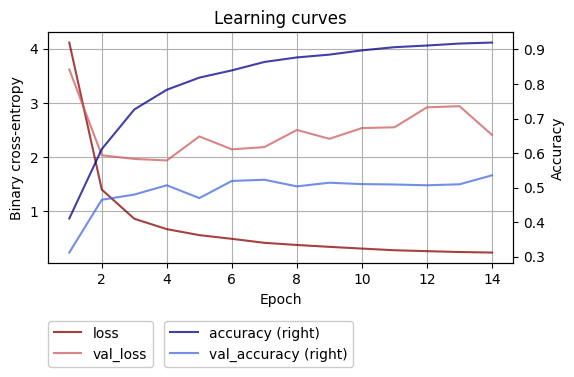

In [ ]:
# Create DataFrame object
df_hist = pd.DataFrame.from_dict(trained.history)
df_hist["Epoch"] = np.arange(1, len(df_hist) + 1, 1)
# Plot learning curves
secondary_y = ["accuracy", "val_accuracy"]  #  ["AUROC", "val_AUROC"] 
ax = df_hist.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                  secondary_y = secondary_y,
                  kind="line", figsize=(6, 3), grid=True, legend=True,
                  ylabel="Binary cross-entropy", 
                  xlabel="Epoch", title="Learning curves",                  
                  color=['darkred', 'indianred', "darkblue", "royalblue"], alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Accuracy")
ax.right_ax.legend(loc=(0.25, -0.45), framealpha=1.0)
ax.legend(loc=(0, -0.45), framealpha=1.0)
plt.show()

There was an improvement in the cnn as the val_accuracy has increased and the val_loss has decreased, but there is still overfitting.

### **CNN3 - number of filters**

The number of filters determines the capacity of the CNN - how much information the model can learn and represent. A higher number of filters can capture more complex patterns and representations in the input data, which can potentially result in better performance.  Filters in CNNs are responsible for extracting relevant features from the input data.

In order to try improving model performance the group decided to tune the number of filters in the 2 layers.

64/128 -- loss: 0.1795 - accuracy: 0.9422 - val_loss: 2.6625 - val_accuracy: 0.5280

64/64 -- loss: 0.2224 - accuracy: 0.9236 - val_loss: 3.2708 - val_accuracy: 0.4811

64/32 -- loss: 0.3215 - accuracy: 0.8916 - val_loss: 2.2717 - val_accuracy: 0.5243

The chosen values were 64 and 128.

In [ ]:
# Define the model
cnn3 = keras.Sequential([
    layers.Input(shape=(140, 100, 3)),    
    # Data preprocessing
    layers.Rescaling(1./255), 
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.45),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Print a summary of the model architecture
cnn3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 140, 100, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 138, 98, 64)       1792      
                                                                 
 batch_normalization_24 (Bat  (None, 138, 98, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 69, 49, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 67, 47, 128)       73856     
                                                                 
 batch_normalization_25 (Bat  (None, 67, 47, 128)    

In [ ]:
trained = cnn3.fit(ds_train, epochs=14, validation_data=(ds_test))

Epoch 1/14
686/686 [==============================] - 65s 93ms/step - loss: 7.1489 - accuracy: 0.4104 - val_loss: 6.5697 - val_accuracy: 0.2560
Epoch 2/14
686/686 [==============================] - 63s 91ms/step - loss: 1.9164 - accuracy: 0.6172 - val_loss: 5.0099 - val_accuracy: 0.3314
Epoch 3/14
686/686 [==============================] - 62s 91ms/step - loss: 0.8920 - accuracy: 0.7476 - val_loss: 2.4088 - val_accuracy: 0.4669
Epoch 4/14
686/686 [==============================] - 62s 91ms/step - loss: 0.5967 - accuracy: 0.8155 - val_loss: 2.0888 - val_accuracy: 0.5066
Epoch 5/14
686/686 [==============================] - 62s 91ms/step - loss: 0.4656 - accuracy: 0.8497 - val_loss: 2.5237 - val_accuracy: 0.4683
Epoch 6/14
686/686 [==============================] - 62s 90ms/step - loss: 0.4000 - accuracy: 0.8723 - val_loss: 2.8354 - val_accuracy: 0.4754
Epoch 7/14
686/686 [==============================] - 62s 90ms/step - loss: 0.3500 - accuracy: 0.8860 - val_loss: 2.3350 - val_accuracy:

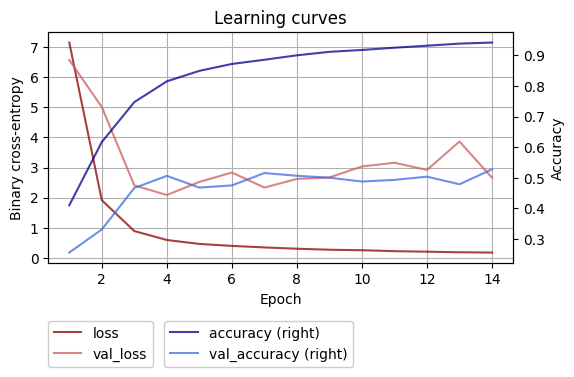

In [ ]:
# Create DataFrame object
df_hist = pd.DataFrame.from_dict(trained.history)
df_hist["Epoch"] = np.arange(1, len(df_hist) + 1, 1)
# Plot learning curves
secondary_y = ["accuracy", "val_accuracy"]  #  ["AUROC", "val_AUROC"] 
ax = df_hist.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                  secondary_y = secondary_y,
                  kind="line", figsize=(6, 3), grid=True, legend=True,
                  ylabel="Binary cross-entropy", 
                  xlabel="Epoch", title="Learning curves",                  
                  color=['darkred', 'indianred', "darkblue", "royalblue"], alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Accuracy")
ax.right_ax.legend(loc=(0.25, -0.45), framealpha=1.0)
ax.legend(loc=(0, -0.45), framealpha=1.0)
plt.show()

This cnn has similar levels of performance but will be chosen over cnn2 since it has a higher capabilty of learning patterns.

### **CNN4 - number of layers**

The number of parameters in a CNN determines its capacity, i.e., how much information the model can learn and represent. A higher number of parameters can allow the model to learn more complex patterns and representations in the input data, potentially resulting in better performance.

So one extra layer was added with different numbers of filters - the number that led to the best performance was chosen.

In [ ]:
# Define the model
cnn4 = keras.Sequential([
    layers.Input(shape=(140, 100, 3)),    
    # Data preprocessing
    layers.Rescaling(1./255), 
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.45),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Print a summary of the model architecture
cnn4.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_17 (Rescaling)    (None, 140, 100, 3)       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 138, 98, 64)       1792      
                                                                 
 batch_normalization_32 (Bat  (None, 138, 98, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 69, 49, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 67, 47, 128)       73856     
                                                                 
 batch_normalization_33 (Bat  (None, 67, 47, 128)    

In [ ]:
trained = cnn4.fit(ds_train, epochs=14, validation_data=(ds_test))

Epoch 1/14
686/686 [==============================] - 73s 103ms/step - loss: 2.8729 - accuracy: 0.4049 - val_loss: 2.7308 - val_accuracy: 0.3566
Epoch 2/14
686/686 [==============================] - 69s 101ms/step - loss: 1.8673 - accuracy: 0.5571 - val_loss: 1.9887 - val_accuracy: 0.4649
Epoch 3/14
686/686 [==============================] - 69s 100ms/step - loss: 1.2551 - accuracy: 0.6590 - val_loss: 2.2367 - val_accuracy: 0.4689
Epoch 4/14
686/686 [==============================] - 69s 101ms/step - loss: 0.8481 - accuracy: 0.7446 - val_loss: 1.4958 - val_accuracy: 0.5991
Epoch 5/14
686/686 [==============================] - 69s 100ms/step - loss: 0.6231 - accuracy: 0.8012 - val_loss: 1.3497 - val_accuracy: 0.6260
Epoch 6/14
686/686 [==============================] - 69s 100ms/step - loss: 0.4687 - accuracy: 0.8454 - val_loss: 1.4673 - val_accuracy: 0.6166
Epoch 7/14
686/686 [==============================] - 69s 100ms/step - loss: 0.4026 - accuracy: 0.8667 - val_loss: 1.4298 - val_ac

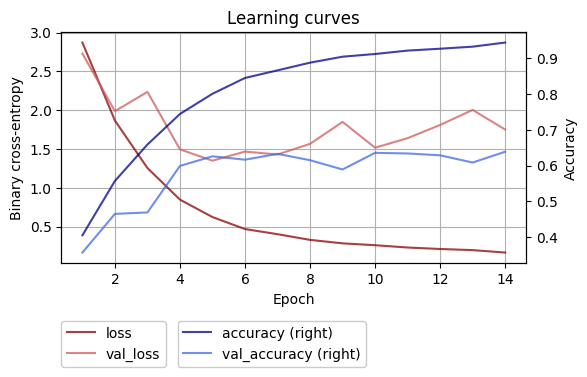

In [ ]:
# Create DataFrame object
df_hist = pd.DataFrame.from_dict(trained.history)
df_hist["Epoch"] = np.arange(1, len(df_hist) + 1, 1)
# Plot learning curves
secondary_y = ["accuracy", "val_accuracy"]  #  ["AUROC", "val_AUROC"] 
ax = df_hist.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                  secondary_y = secondary_y,
                  kind="line", figsize=(6, 3), grid=True, legend=True,
                  ylabel="Binary cross-entropy", 
                  xlabel="Epoch", title="Learning curves",                  
                  color=['darkred', 'indianred', "darkblue", "royalblue"], alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Accuracy")
ax.right_ax.legend(loc=(0.25, -0.45), framealpha=1.0)
ax.legend(loc=(0, -0.45), framealpha=1.0)
plt.show()

Since the model still has overfitting, which the group will try to reduce by increasing dropout.

### **CNN5** - dropout

In [ ]:
# Define the model
cnn5 = keras.Sequential([
    layers.Input(shape=(140, 100, 3)),    
    # Data preprocessing
    layers.Rescaling(1./255), 
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.45),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Print a summary of the model architecture
cnn5.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_14 (Rescaling)    (None, 140, 100, 3)       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 138, 98, 64)       1792      
                                                                 
 batch_normalization_42 (Bat  (None, 138, 98, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 69, 49, 64)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 69, 49, 64)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 67, 47, 128)     

In [ ]:
trained = cnn5.fit(ds_train, epochs=22, validation_data=(ds_test))

Epoch 1/22
686/686 [==============================] - 17s 21ms/step - loss: 3.1627 - accuracy: 0.3692 - val_loss: 3.4974 - val_accuracy: 0.3109
Epoch 2/22
686/686 [==============================] - 14s 20ms/step - loss: 2.0824 - accuracy: 0.5151 - val_loss: 2.0866 - val_accuracy: 0.4149
Epoch 3/22
686/686 [==============================] - 14s 20ms/step - loss: 1.5840 - accuracy: 0.5905 - val_loss: 1.6336 - val_accuracy: 0.5134
Epoch 4/22
686/686 [==============================] - 14s 20ms/step - loss: 1.1526 - accuracy: 0.6615 - val_loss: 1.7555 - val_accuracy: 0.5009
Epoch 5/22
686/686 [==============================] - 14s 20ms/step - loss: 0.9101 - accuracy: 0.7133 - val_loss: 1.5934 - val_accuracy: 0.5494
Epoch 6/22
686/686 [==============================] - 14s 20ms/step - loss: 0.7275 - accuracy: 0.7617 - val_loss: 1.2111 - val_accuracy: 0.6154
Epoch 7/22
686/686 [==============================] - 14s 20ms/step - loss: 0.6274 - accuracy: 0.7927 - val_loss: 1.2444 - val_accuracy:

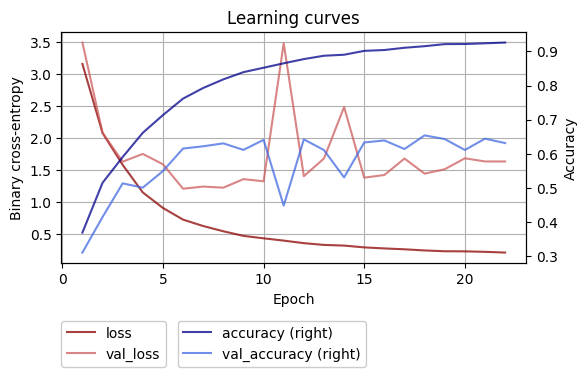

In [ ]:
# Create DataFrame object
df_hist = pd.DataFrame.from_dict(trained.history)
df_hist["Epoch"] = np.arange(1, len(df_hist) + 1, 1)
# Plot learning curves
secondary_y = ["accuracy", "val_accuracy"]  #  ["AUROC", "val_AUROC"] 
ax = df_hist.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                  secondary_y = secondary_y,
                  kind="line", figsize=(6, 3), grid=True, legend=True,
                  ylabel="Binary cross-entropy", 
                  xlabel="Epoch", title="Learning curves",                  
                  color=['darkred', 'indianred', "darkblue", "royalblue"], alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Accuracy")
ax.right_ax.legend(loc=(0.25, -0.45), framealpha=1.0)
ax.legend(loc=(0, -0.45), framealpha=1.0)
plt.show()

The model now is capable of generalizing better despite there still being some overfitting.

### **CNN6 - dense**

Dense layers, also known as fully connected layers, add additional capacity to the CNN by providing global connections across all feature maps.

In [ ]:
# Define the model
cnn6 = keras.Sequential([
    layers.Input(shape=(140, 100, 3)),    
    # Data preprocessing
    layers.Rescaling(1./255), 
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.45),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Print a summary of the model architecture
cnn6.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_16 (Rescaling)    (None, 140, 100, 3)       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 138, 98, 64)       1792      
                                                                 
 batch_normalization_48 (Bat  (None, 138, 98, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 69, 49, 64)       0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 69, 49, 64)        0         
                                                                 
 conv2d_49 (Conv2D)          (None, 67, 47, 128)     

In [ ]:
trained = cnn6.fit(ds_train, epochs=22, validation_data=(ds_test))

Epoch 1/22
686/686 [==============================] - 17s 21ms/step - loss: 2.1685 - accuracy: 0.2367 - val_loss: 1.8812 - val_accuracy: 0.3163
Epoch 2/22
686/686 [==============================] - 14s 21ms/step - loss: 1.6766 - accuracy: 0.3949 - val_loss: 2.0109 - val_accuracy: 0.3509
Epoch 3/22
686/686 [==============================] - 14s 21ms/step - loss: 1.3644 - accuracy: 0.5109 - val_loss: 1.7852 - val_accuracy: 0.4334
Epoch 4/22
686/686 [==============================] - 14s 21ms/step - loss: 1.1783 - accuracy: 0.5821 - val_loss: 2.0764 - val_accuracy: 0.4171
Epoch 5/22
686/686 [==============================] - 14s 21ms/step - loss: 1.0165 - accuracy: 0.6403 - val_loss: 1.7386 - val_accuracy: 0.4737
Epoch 6/22
686/686 [==============================] - 14s 21ms/step - loss: 0.8859 - accuracy: 0.6862 - val_loss: 1.6163 - val_accuracy: 0.5097
Epoch 7/22
686/686 [==============================] - 14s 21ms/step - loss: 0.7922 - accuracy: 0.7189 - val_loss: 1.2891 - val_accuracy:

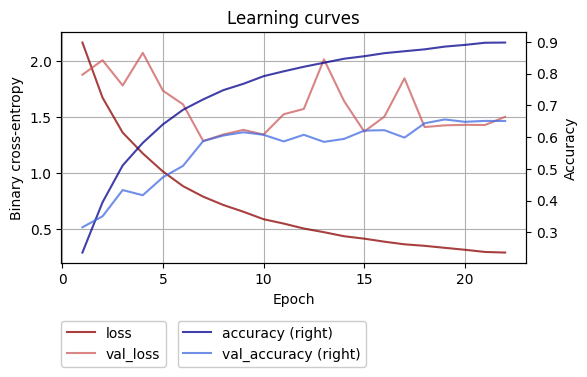

In [ ]:
# Create DataFrame object
df_hist = pd.DataFrame.from_dict(trained.history)
df_hist["Epoch"] = np.arange(1, len(df_hist) + 1, 1)
# Plot learning curves
secondary_y = ["accuracy", "val_accuracy"]  #  ["AUROC", "val_AUROC"] 
ax = df_hist.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                  secondary_y = secondary_y,
                  kind="line", figsize=(6, 3), grid=True, legend=True,
                  ylabel="Binary cross-entropy", 
                  xlabel="Epoch", title="Learning curves",                  
                  color=['darkred', 'indianred', "darkblue", "royalblue"], alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Accuracy")
ax.right_ax.legend(loc=(0.25, -0.45), framealpha=1.0)
ax.legend(loc=(0, -0.45), framealpha=1.0)
plt.show()

### **CNN7 - layers**

One more layer was added to see if it could improve performance before further tuning the network, since adding a layer might lead to different optimal parameters.

In [ ]:
# Define the model
cnn7 = keras.Sequential([
    layers.Input(shape=(140, 100, 3)),    
    # Data preprocessing
    layers.Rescaling(1./255), 
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.45),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn7.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Print a summary of the model architecture
cnn7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 140, 100, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 138, 98, 64)       1792      
                                                                 
 batch_normalization_2 (Batc  (None, 138, 98, 64)      256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 69, 49, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 69, 49, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 67, 47, 128)      

In [ ]:
trained = cnn7.fit(ds_train, epochs=21, validation_data=(ds_test))

Epoch 1/21
686/686 [==============================] - 31s 23ms/step - loss: 1.8457 - accuracy: 0.3591 - val_loss: 1.7080 - val_accuracy: 0.4111
Epoch 2/21
686/686 [==============================] - 15s 22ms/step - loss: 1.3801 - accuracy: 0.5230 - val_loss: 1.5841 - val_accuracy: 0.4783
Epoch 3/21
686/686 [==============================] - 15s 22ms/step - loss: 1.1453 - accuracy: 0.6055 - val_loss: 1.2776 - val_accuracy: 0.5760
Epoch 4/21
686/686 [==============================] - 15s 22ms/step - loss: 0.9764 - accuracy: 0.6660 - val_loss: 1.2128 - val_accuracy: 0.6183
Epoch 5/21
686/686 [==============================] - 15s 22ms/step - loss: 0.8542 - accuracy: 0.7073 - val_loss: 1.3602 - val_accuracy: 0.5831
Epoch 6/21
686/686 [==============================] - 15s 22ms/step - loss: 0.7536 - accuracy: 0.7407 - val_loss: 1.1396 - val_accuracy: 0.6497
Epoch 7/21
686/686 [==============================] - 15s 22ms/step - loss: 0.6688 - accuracy: 0.7720 - val_loss: 1.1345 - val_accuracy:

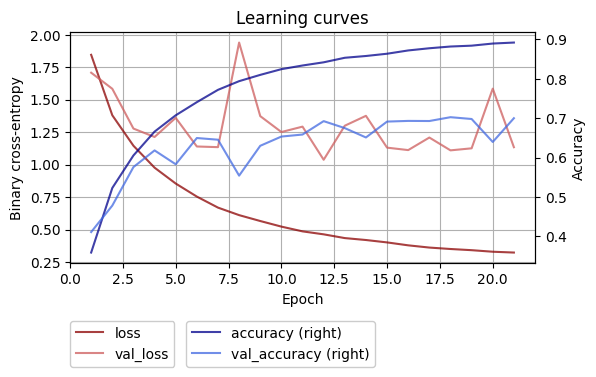

In [ ]:
# Create DataFrame object
df_hist = pd.DataFrame.from_dict(trained.history)
df_hist["Epoch"] = np.arange(1, len(df_hist) + 1, 1)
# Plot learning curves
secondary_y = ["accuracy", "val_accuracy"]  #  ["AUROC", "val_AUROC"] 
ax = df_hist.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                  secondary_y = secondary_y,
                  kind="line", figsize=(6, 3), grid=True, legend=True,
                  ylabel="Binary cross-entropy", 
                  xlabel="Epoch", title="Learning curves",                  
                  color=['darkred', 'indianred', "darkblue", "royalblue"], alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Accuracy")
ax.right_ax.legend(loc=(0.25, -0.45), framealpha=1.0)
ax.legend(loc=(0, -0.45), framealpha=1.0)
plt.show()

The performance of the model got better with the extra layer, but there is still overfitting.

After this, to increase performance and decrease overfitting, the group tried changing activation_function, kernel/filter size, number of filters, add l1 and l2 regularization, metrics, optimizer, alter the drop out rates, padding, kernel_initializer, and even adding 1 more layer but it didn´t affect the performance of the model.

This can either mean that the CNN architecture may not have enough capacity to learn the underlying patterns in the data. Or that it is due to dataset limitations.

The dataset used for training the CNN may not be large enough to fully capture the underlying patterns in the data or the dataset may be Inadequate, which can result in poor generalization, performance and limit the effectiveness of hyperparameter tuning.

55/55 [==============================] - 1s 7ms/step


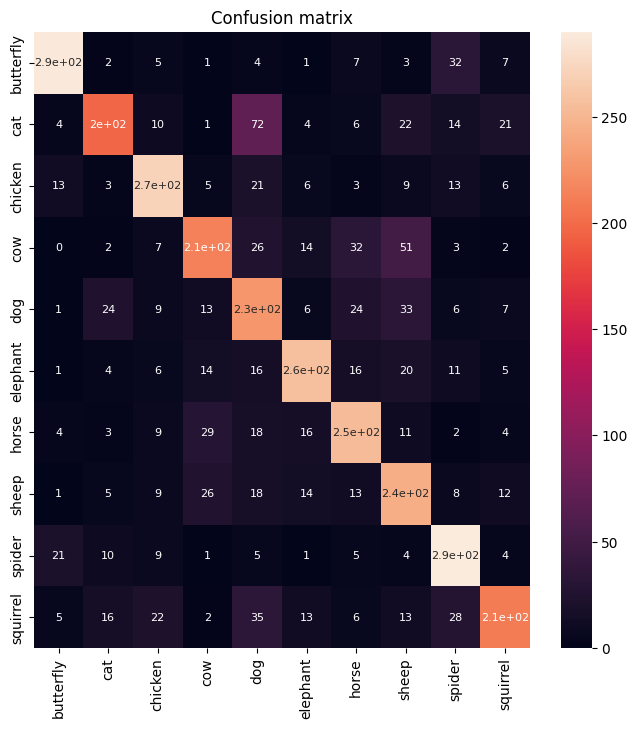

In [ ]:
# Extract true labels from ds_test
true_labels = []
for _, labels in ds_test:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())

true_labels = np.array(true_labels)

predictions = cnn7.predict(ds_test)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

class_names = ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
CM = confusion_matrix(true_labels, pred_labels)

# Set plot size
plt.figure(figsize=(8, 8))
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 8}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
def evaluate_model(true_labels, num_classes, predicted_labels, class_names):

    # Calculate evaluation metrics
    precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predicted_labels, average=None)
    accuracy = accuracy_score(true_labels, predicted_labels)

    # Store evaluation metrics for each class
    class_metrics = {}
    for i in range(num_classes):
        class_metrics[class_names[i]] = {'precision': precision[i], 'recall': recall[i], 'f1_score': f1_score[i]}
    
    # Print evaluation metrics for each class
    print("{:<20} {:<10} {:<10} {:<10}".format('Class', 'F1-score', 'Accuracy', 'Recall'))
    print("-" * 45)
    for i in range(num_classes):
        class_name = class_names[i]
        f1 = round(class_metrics[class_name]['f1_score'], 2)
        precision = round(class_metrics[class_name]['precision'], 2)
        accuracy = round(accuracy_score([idx==i for idx in true_labels], [idx==i for idx in predicted_labels]), 2)
        print("{:<20} {:<10} {:<10} {:<10}".format(class_name, f1, accuracy, precision))
    
    return accuracy, class_metrics

accuracy, class_metrics=evaluate_model(true_labels, 10, pred_labels, class_names)


Class                F1-score   Accuracy   Recall    
---------------------------------------------
butterfly            0.84       0.97       0.85      
cat                  0.64       0.94       0.74      
chicken              0.77       0.95       0.76      
cow                  0.65       0.93       0.7       
dog                  0.57       0.9        0.51      
elephant             0.75       0.95       0.77      
horse                0.71       0.94       0.69      
sheep                0.64       0.92       0.6       
spider               0.77       0.95       0.71      
squirrel             0.67       0.94       0.76      


The results are satisfactory, and it is visble that the more common mistakes are butterfly vs spider, cat vs dog, cow vs sheep vs horse, dog vs squirrel - which are animal that share the most similarities, so it is to be expected.

Also not surprisingly, the dog category has the worst performance, which is to be expected since the different breed are very different from each other, which makes it harder to identify features and patterns.

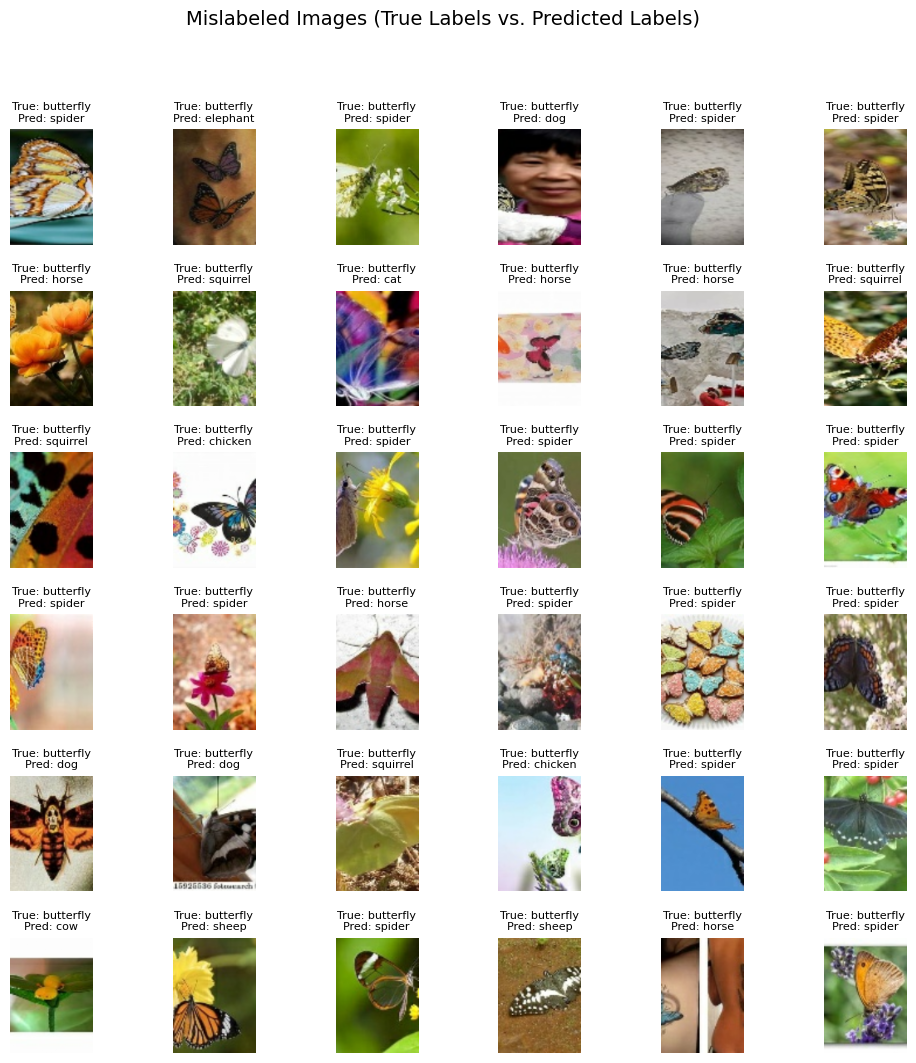

In [ ]:
# Get mislabeled image indices
mislabel_indices = np.where(true_labels != pred_labels)[0][:36]  # Get first 36 mislabeled image indices

# Set plot size
plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i, idx in enumerate(mislabel_indices):
    plt.subplot(6, 6, i+1)
    plt.imshow(ds_test.unbatch().skip(idx).take(1).as_numpy_iterator().next()[0] / 255.0)  # Scale by dividing by 255
    plt.title(f'True: {class_names[true_labels[idx]]}\nPred: {class_names[pred_labels[idx]]}', fontsize=8)
    plt.axis('off')

plt.suptitle('Mislabeled Images (True Labels vs. Predicted Labels)', fontsize=14)
plt.show()


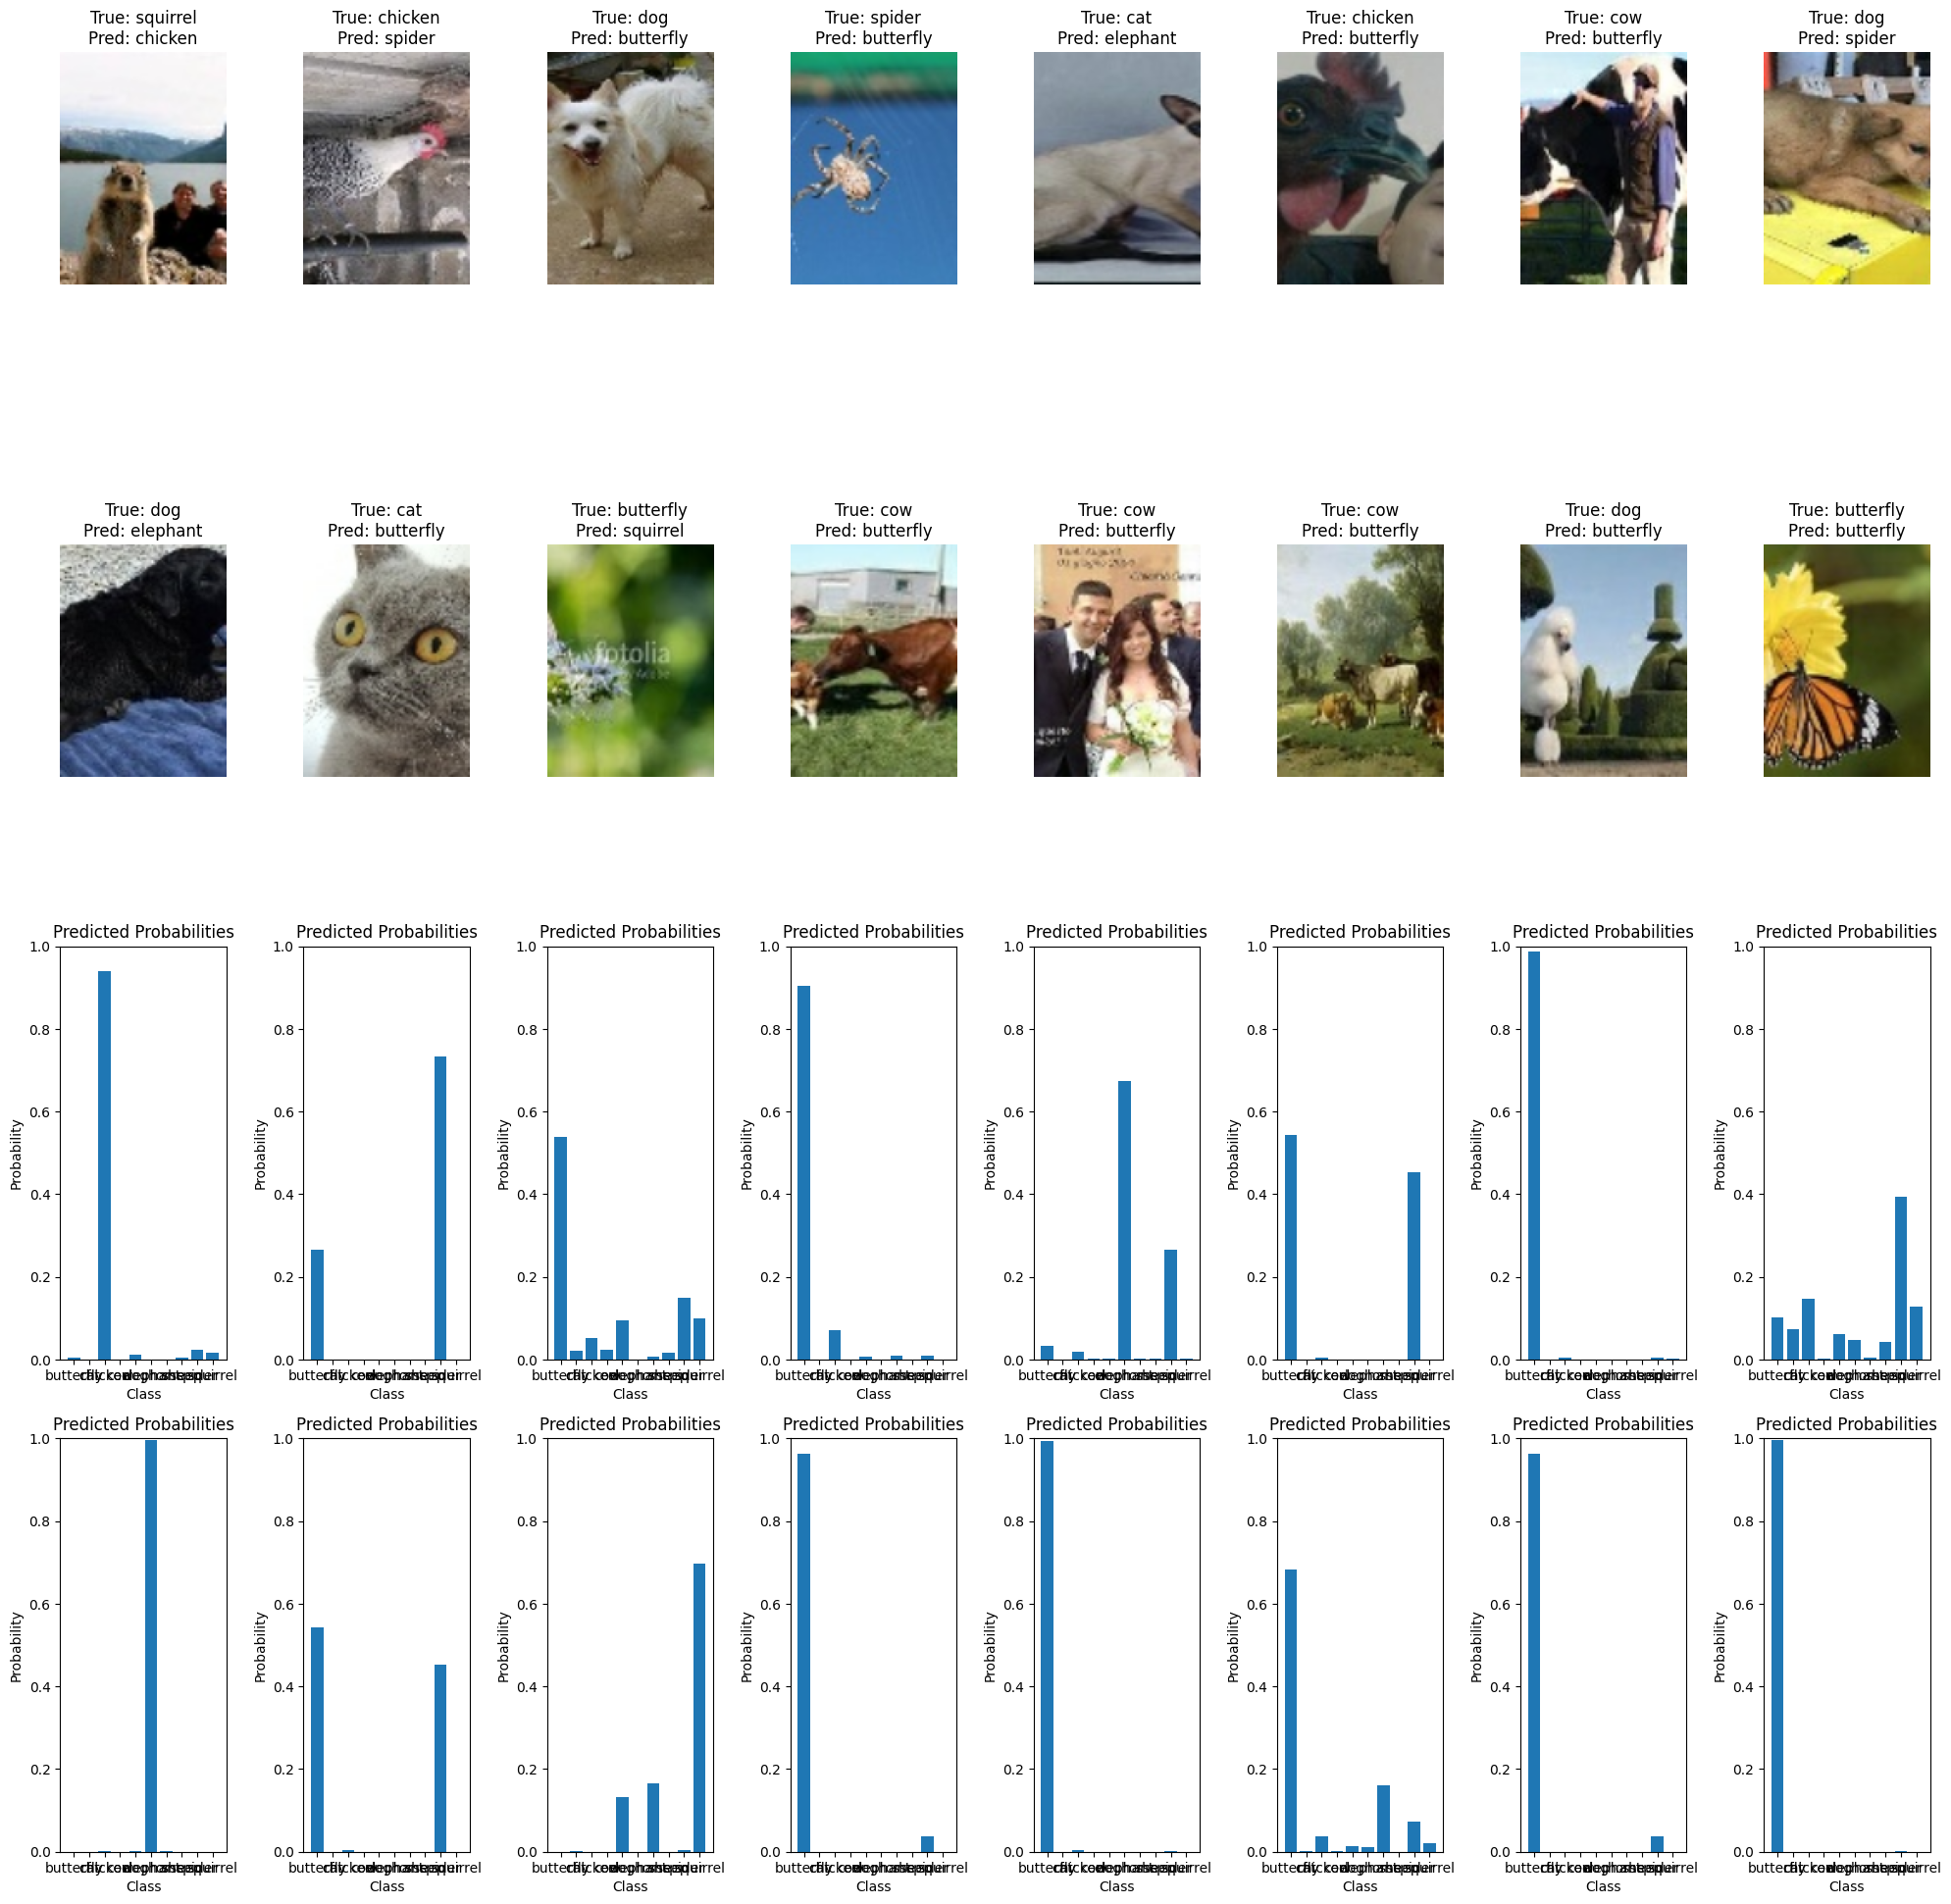

In [ ]:
# Find mislabeled images
mislabel_indices = np.where(true_labels != pred_labels)[0]
np.random.shuffle(mislabel_indices)
mislabel_indices = mislabel_indices[:16]

# Set figure size
fig = plt.figure(figsize=(20, 20))

for i, index in enumerate(mislabel_indices):
    image = None
    label = None
    for j, labels in ds_test:
        if index < labels.shape[0]:
            image = j[index] / 255.0  # Scale the image by dividing by 255
            label = labels[index]
            break
        else:
            index -= labels.shape[0]

    # Create subplot for image
    ax1 = fig.add_subplot(4, 8, i + 1)
    ax1.imshow(image.numpy().squeeze(), cmap='gray')
    ax1.axis('off')
    ax1.set_title(f'True: {class_names[tf.argmax(label)]}\nPred: {class_names[pred_labels[index]]}')

    probas = predictions[index]
    
    # Create subplot for bar chart
    ax2 = fig.add_subplot(4, 8, i + 17)
    ax2.bar(class_names, probas)
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Probability')
    ax2.set_title('Predicted Probabilities')
    ax2.set_ylim([0, 1])

plt.tight_layout()
plt.show()


### **Conclusions**

The plotting of the misslabaled images as well as the probabilities the model assigned of the images being each category lead the group to conclude that the quality of the dataset is probably having a significant impact on the performance of the model. There are images when the animal is cropped or hard to find, as well as nonsesical images such as the picture of the bride.

Images similar to these are probably also used in the training of the model which further decreases it's reliability.

The only way to make sure such images are not used would be do to perform visual inspection of the dataset, which is not reasonable to do considering it comes with 25 thousand images, and so 70% accuracy would be a satisfatory result.

____

Building the cnn by hand is a intuitive way to construct the cnn, has it makes it easier for less experienced people to visualize the effects of certain paremters. The advantages are the control over the model and the interpretability - since the models are built by hand there is a good understanding of the cnn's composition, and purpose of each component.
The disadvantages are that it lacks optimization and hence probably leads to suboptical performance - there are too many possible combinations of parameters and layers to possibly try them all by hand, and the combination of parameters is not a reflction of only one paremeter, which makes it harder to get a proper sense of how to proceed. This method requires understanding of cnn's as well as time to carefully analyze each output and the try a new cnn.